# Analiza zločina u Sjedinjenim Američkim Državama

"*Da je čovječanstvo odvajkada bilo razumno, historija ne bi bila dugačka hronika gluposti i zločina.*"
-> Arthur Schopenhauer

## Uvod

Zločini su nažalost normalna pojava današnjice i kao takvi su prisutni u svim "ljudima" nastanjenim područjima.
Zanimljivo je da je sama riječ zločin proizašla iz latinske riječi *cernō*, što znači "Ja odlučujem, ja dajem sud!".

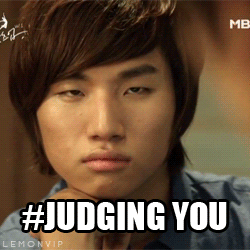

In [10]:
Image('img/judging.gif')   

U ovom radu koncentrirat ćemo se na zločine počinjene u Sjedinjenim Američkim Državama, točnije na zločine koji spadaju u kategorije ubojstava,silovanja i nasilnih zločina i njihove povezanosti s razvijenošću. 
Možda se pitate zašto upravo SAD? Odgovor je, zato što smo jako fokusirani na događanja na drugom kontinentu,a i zbog pretpostavke koju dobivamo iz medija da tamo postoji "ne mali" broj kriminalnih djela.

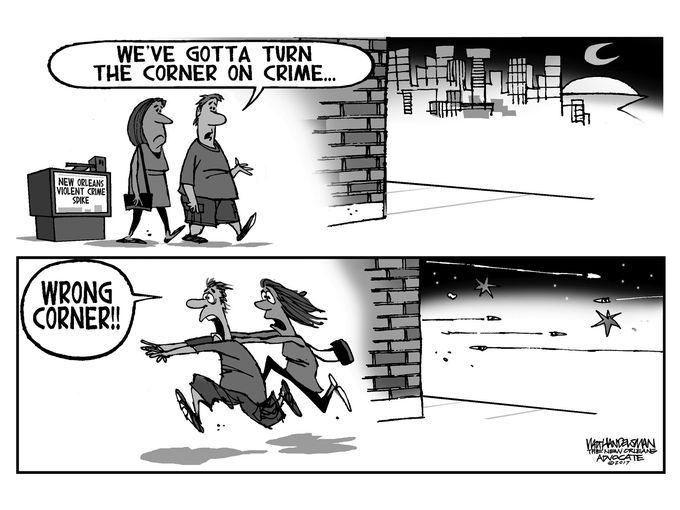

In [9]:
Image('img/crimeCartoon.jpg',width="500")

In [4]:
#tu cu importat sve sta ce mi trebat
import pandas as pd
import scipy as sc
from scipy import stats
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import statsmodels.api as sm
from IPython.display import display
from IPython.html import widgets
from IPython.html.widgets import interact, fixed
import sympy as sy
from IPython.display import Image

/home/migamul/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/home/migamul/anaconda3/lib/python3.6/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated since IPython 4.0. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


U ovom radu ispitat ćemo povezanost stope zločina (nasilni zločini [eng.violent crime],
ubojstva [eng.murder], silovanja [eng.rape]) po 100 000 stanovnika s gospodarskom razvijenosću pojedine savezne države.
Na kraju ćemo na temelju podataka o stopama zločina u vremenskom intervalu od 1976. do 2015. godine na razini cijelog SAD-a promatrati trend porasta/opadanja kriminalnih djela, procjeniti stopu zločina za 2016. i 2017. godinu ( i usporediti ih s pravim vrijednostima) te pokušati projecirati potencijalni broj zločina za 2018. godinu.

In [5]:
slika ce ic

SyntaxError: invalid syntax (<ipython-input-5-7be3d08cad8e>, line 1)

##  Prikupljanje podataka

Podaci o kriminalnim djelima preuzeti su s web stranice FBI: Uniform Crime Reporting koju možete naći na sljedećem linku: https://ucr.fbi.gov 

Korišteni su sljedeći podaci:

• Tablica 1 - podatak za stope zločina po 100 000 stanovnika na razini cijelog SAD-a u vremenskom intervalu od 1976. do 2015. godine. Ti podaci su spemljeni u datoteci crimes.txt. 

• Tablica 3 - podaci za zločine iz 2016. godine na razini saveznih država. Za svaku saveznu državu je izračunata stopa zločina po 100 000 stanovnika prema formuli: $s = \frac{brojZlocina}{Populacija}*100 000$.

Također koristimo podatke o stopi BDP-a (po stanovniku (izraženo u US dolarima) za 2016. godinu po saveznim državama te će nam taj podatak biti pokazatelj gospodarske razvijenosti pojedine savezne države.

Ti podaci su spremljeni u datoteci states.txt dok se sama Tablica 3 može pronaći u folderu data/.

## 1. Analiza stope BDP-a i stope zločina po saveznim državama za 2016. godinu 

U ovom dijelu koristimo podatke it datoteke *staes.txt* . Prikaz datoteke *states.txt* :

In [147]:
names = ['state','populacija','zlocini','stopa_zlocina','BDP']
datas = pd.read_csv('data/states.txt', delimiter='\t', names=names) 

#pretvorba brojcanih vrijednosti u float i int
populacija1 = [int(v) for v in datas.populacija]
datas['populacija'] = populacija1
zlocini1 = [int(v) for v in datas.zlocini]
datas['zlocini'] = zlocini1
stopa_zlocina1 = [float(v) for v in datas.stopa_zlocina]
datas['stopa_zlocina'] = stopa_zlocina1
BDP1 = [float(v) for v in datas.BDP]
datas['BDP'] = BDP1

state = np.asarray(datas.state)
populacijas = np.asarray(datas.populacija)
zlocinis = np.asarray(datas.zlocini)
stopa_zlocina = np.asarray(datas.stopa_zlocina)
BDP = np.asarray(datas.BDP)

datas.head()

,state,populacija,zlocini,stopa_zlocina,BDP
0,Alabama,4863300,25886,532.3,42124.0
1,Alaska,741894,5966,804.2,58356.0
2,Arizona,6931071,32583,470.1,43709.0
3,Arkansas,2988248,16461,550.9,40388.0
4,California,39250017,174796,445.3,66310.0


Radimo opisnu analizu podataka. Zadani podaci su stopa zločina po saveznoj državi u 2016. godini te stopa BDP-a po stanovniku izražena u US dolarima za 2016. godinu.
Navedene podatke zovemo uzorci, a označavamo ih s $x$.

### Korištene vrijednosti:

duljina uzorka:  $n$

minimum ($min$):  minimalna vrijednost koju poprima uzorak

maksimum ($max$):  minimalna vrijednost koju poprima uzorak 

aritmetička sredina ($\mu$):  $\mu=\frac{x_1+ \dots + x_1}{n}$ 

varijanca ($Var$):  $Var= \frac{\sum_{1}^{n} (x_i-\mu)^2}{n}$

standardna devijacija ($\sigma$):  $\sigma = \sqrt{Var}$


In [16]:
def kategorija(x):
    n, (minimum, maximum), mean, var, s, k = stats.describe(x)
    return np.array([mean, var, np.sqrt(var), minimum ,maximum])

ispis={ '': pd.Series(np.array([r'$\mu$', '$Var$', r'$\sigma$', '$min$' ,'$max$'])),
        'stopa_zlocina': pd.Series(kategorija(stopa_zlocina)),
        'BDP': pd.Series(kategorija(BDP))
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,BDP,stopa_zlocina
,,
$\mu$,5.696875e+04,394.270588
$Var$,4.338107e+08,34210.366918
$\sigma$,2.082812e+04,184.960447
$min$,3.602900e+04,123.800000
$max$,1.861720e+05,1205.900000


### Histogrami

Histogramom ćemo pomoću relativnih frekvencija naslutiti distibuciju uzorka te ćemo nacrtati i normalnu funkciju gustoće za uzorak (crvena iscrtana linija) kako bi mogli predvidjeti je li distribucija normalna.

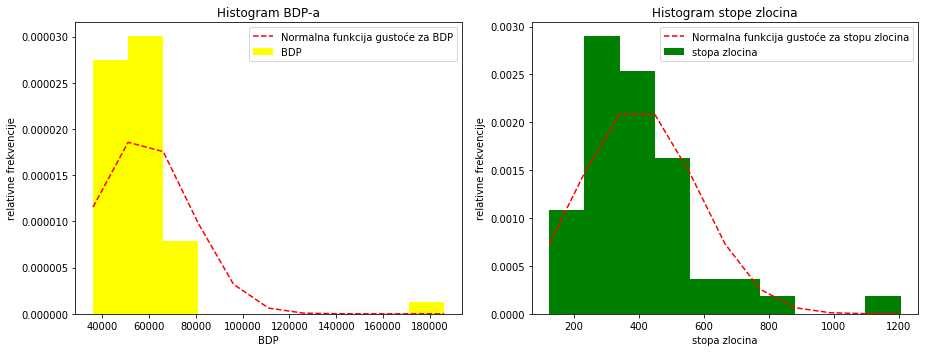

In [116]:
fig, axes = plt.subplots(1,2,figsize=(13, 5))

n, bins, patches = axes[0].hist(BDP, normed=1, facecolor='yellow', alpha=1, label="BDP")
y = mlab.normpdf(bins, BDP.mean(), np.sqrt(BDP.var()))
axes[0].plot(bins, y, 'r--', label=u'Normalna funkcija gustoće za BDP')
axes[0].set_xlabel('BDP')
axes[0].set_ylabel('relativne frekvencije')
axes[0].set_title('Histogram BDP-a');

n, bins, patches = axes[1].hist(stopa_zlocina, normed=1, facecolor='green', alpha=1, label="stopa zlocina")
y = mlab.normpdf(bins, stopa_zlocina.mean(), np.sqrt(stopa_zlocina.var()))
axes[1].plot(bins, y, 'r--', label=u'Normalna funkcija gustoće za stopu zlocina')
axes[1].set_xlabel('stopa zlocina')
axes[1].set_ylabel('relativne frekvencije')
axes[1].set_title('Histogram stope zlocina');

axes[0].legend()
axes[1].legend()
fig.tight_layout();

Iz histograma možemo pretpostaviti da niti jedan podatak nema normalnu distribuciju što ćemo dokazati statističkim testovima.

### Boxplot

Neka je $x=(x_1, \dots , x_n)$ uzorak. U našem slučaju su to stopa BDP-a i stopa zlocina. 
Neka je $x_{(1)}, \dots , x_{(n)}$ sortirani uzorak.
Neka su $q_L$ donji kvartil uzorka, $q_U$ gornji kvartil uzorka. Inerkvartil se definira kao $IQR=q_U-q_L$.
Karakteristična petorka uzorka je $(x_{(1)}, q_L, m, q_U, x_{(n)})$ .
Kružići označavaju sve točke izvan tih granica i smatraju se outlierima.

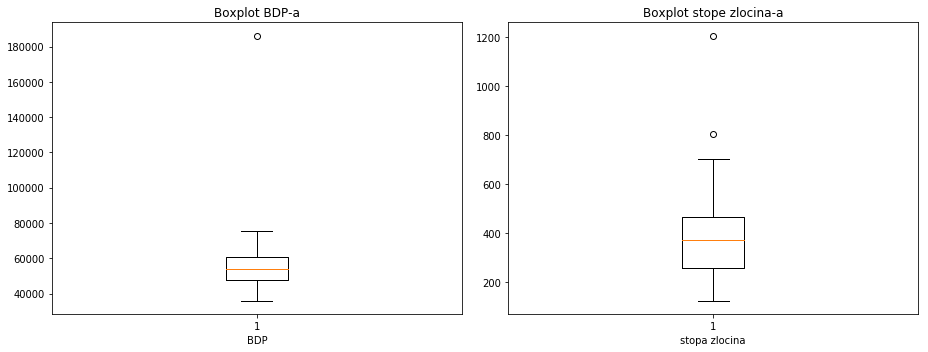

In [119]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
axes[0].boxplot(BDP)
axes[0].set_xlabel('BDP')
axes[0].set_title(r'Boxplot BDP-a');
axes[1].boxplot(stopa_zlocina)
axes[1].set_xlabel('stopa zlocina')
axes[1].set_title(r'Boxplot stope zlocina-a');

fig.tight_layout();

### Ispitivanje normalnosti uzorka

Želimo ispitati jesu li dani uzorci stopa BDP-a po stanovniku i stopa zlocina, svaki u oznaci $ Y = (Y_{(1)}, \dots , Y_{(n)}) $ normalno distribuirani.

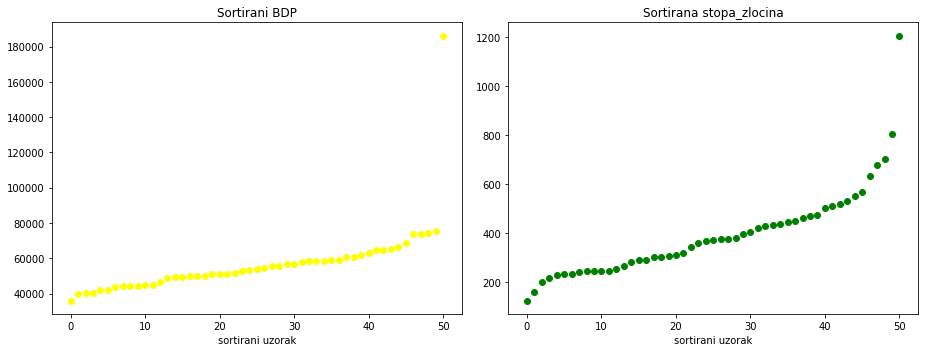

In [121]:
n=np.arange(0,len(BDP))
fig, axes=plt.subplots(1,2, figsize=(13,5))
axes[0].scatter(n, np.sort(BDP), c='yellow') 
axes[0].set_xlabel('sortirani uzorak')
axes[0].set_title(r'Sortirani BDP');
axes[1].scatter(n, np.sort(stopa_zlocina), c='green')
axes[1].set_xlabel('sortirani uzorak')
axes[1].set_title(r'Sortirana stopa_zlocina');
fig.tight_layout();

### Normalni vjerojatnosni graf

Neka je $ y_{(1)}, \dots , y_{(n)} $ uređena realizacija slučajunog uzorka $ Y_{(1)}, \dots , Y_{(n)} $. Pomoću funkcije distribucije jedinične normalne razdiobe $ \Phi $, definiramo brojeve $ x_i = \Phi^{-1} \left( \frac{i-3/8}{n+1/4} \right) $, $ i=1, \dots , n $.
Tada u Kartezijevom koordinatnom sustavu prikažemo parove točaka $ (x_i, y_{(i)}) $.
Ako je $ Y_{(1)}, \dots , Y_{(n)} $ slučajni uzorak iz normalnog modela $N(\mu, \sigma^2)$, onda u normalnom vjerojatnosnom grafu točke $ (x_i, y_{(i)}) $ moraju biti aproksimativno na pravcu $ y= \mu +\sigma x $.

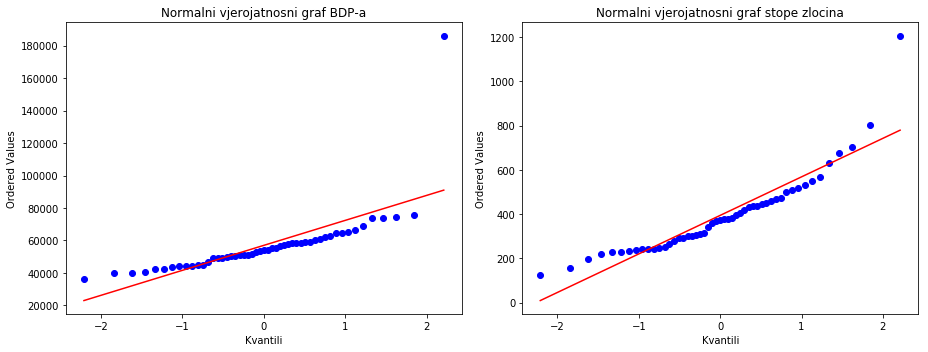

In [122]:
fig, axes = plt.subplots(1,2, figsize=(13,5))
y=sc.stats.probplot(BDP, plot=axes[0])
y=sc.stats.probplot(stopa_zlocina, plot=axes[1])
axes[0].set_xlabel('Kvantili')
axes[0].set_title('Normalni vjerojatnosni graf BDP-a');
axes[1].set_xlabel('Kvantili')
axes[1].set_title('Normalni vjerojatnosni graf stope zlocina');

fig.tight_layout();

Dakle, naša pretpostavka je da niti jedan od podataka (stopa BDP-a i stopa zločina) nema normalnu distribuciju. Tu pretpostavku ćemo u nastavku dokazati statističkim testovima.

## Statistički testovi

### Test normalnosti

Provodimo test nomalnosti za ispitivanje normalnosti distribucije podataka. Na razini značajnosti $\alpha=0.05$ testiramo hipoteze:
\begin{equation*}
\begin{aligned}
&H_0: \, X \sim N(\mu, \sigma^2) \\ &H_1: \, ne \, H_0
\end{aligned}
\end{equation*}

In [31]:
def normalnost (x):
    k,pv = stats.normaltest(x)
    return np.array(pv)
       
ispis={ '': pd.Series(np.array(['p-vrijednost'])),
        'BDP': pd.Series([normalnost(BDP)]),
        'stopa_zlocina': pd.Series([normalnost(stopa_zlocina)]),
      }

ispis_kat = pd.DataFrame(ispis)
ispis_kat = ispis_kat.set_index('')
ispis_kat

,BDP,stopa_zlocina
,,
p-vrijednost,5.463845117998801e-20,1.992268714324982e-08


S obzirom da su sve p-vrijednosti $p<\alpha$ onda na razini značajnosti od $\alpha=0.05$ za uzorke BDP-a i stope zločina možemo odbaciti $H_0$ u korist $H_1$, čime smo potvrdili početne pretpostavke, tj. stopa BDP-a i stopa zločina nemaju normalnu distribuciju.

### Andersonov test

Provjeravamo dolazi li naš uzorak i eksponencijalne distribucije.

In [53]:
def Anderson(x, alpha, d):
    print ('Razina značajnosti je:',alpha)
    if x=='BDP':
        t, C, p = sc.stats.anderson(BDP, dist=d)
    elif x=='stopa_zlocina':
        t, C, p = sc.stats.anderson(stopa_zlocina, dist=d)
    for i in range (5):
        if alpha==p[i].astype('str'):
            krit=C[i]
            break
    sstr = 'testna statistika Andersonovog testa = %6.4f, kriticna vrijednost= %6.4f'
    print (sstr %(t, krit))
    if t>krit :
        print ('Dani uzorak ne dolazi iz ',d,' distribucije')
        
interact(Anderson, x=('BDP', 'stopa_zlocina'), alpha=('15.0', '10.0', '5.0', '2.5', '1.0'), d=('norm','expon'));

ValueError: ('BDP', 'stopa_zlocina') cannot be transformed to a widget

### $\chi^2$ - test nezavisnosti

Provjeravamo jesu li stope BDP-a po stanovniku i stope zlocina nezavisna statistička obilježja.
 
BDP dijelimo u tri kategorije. Savezne države s visokim BDP-om su one čiji BDP po stanovniku iznosi više od $60 000 $USD. Savezne države sa srednjim BDP-om su one čiji BDP po stanovniku iznosi između $45 000$ i $60 000$ USD. Savezne države sa niskim BDP-om su one čiji BDP po stanovniku iznosi manje od $45 000$ USD. 

Stopu zločina također dijelimo u tri kategorije, visoka stopa zlocina: $>470$, srednja stopa zločina: između $250 - 470$ i niska stopa zločina: $<250$ .

In [109]:
#dijelimo podatke u kategorije
visok = datas.stopa_zlocina[datas.BDP >= 60000]
srednji = datas.stopa_zlocina[datas.BDP < 60000][datas.BDP > 45000]
nizak = datas.stopa_zlocina[datas.BDP <= 45000]
visok = [0,0,0]
srednji = [0,0,0]
nizak = [0,0,0]
lista = [250,470]

visok[0] = len(datas.stopa_zlocina[datas.BDP >= 60000][datas.stopa_zlocina <= lista[0]])
srednji[0] = len(datas.stopa_zlocina[datas.BDP < 60000][datas.BDP > 45000][datas.stopa_zlocina <= lista[0]])
nizak[0] = len(datas.stopa_zlocina[datas.BDP <= 45000][datas.stopa_zlocina <= lista[0]])

for i in range (1,2):
    visok[i] = len(datas.stopa_zlocina[datas.BDP >= 60000][datas.stopa_zlocina > lista[i-1]][datas.stopa_zlocina <= lista[i]])
    srednji[i] = len(datas.stopa_zlocina[datas.BDP < 60000][datas.BDP > 45000][datas.stopa_zlocina >lista[i-1]][datas.stopa_zlocina <= lista[i]])
    nizak[i] = len(datas.stopa_zlocina[datas.BDP <= 45000][datas.stopa_zlocina > lista[i-1]][datas.stopa_zlocina <= lista[i]])
    
visok[2] = len(datas.stopa_zlocina[datas.BDP >= 60000][datas.stopa_zlocina >= lista[1]])
srednji[2] = len(datas.stopa_zlocina[datas.BDP < 60000][datas.BDP > 45000][datas.stopa_zlocina >= lista[1]])
nizak[2] = len(datas.stopa_zlocina[datas.BDP <= 45000][datas.stopa_zlocina >= lista[1]]) 

visok, srednji, nizak

([4, 7, 3], [5, 15, 5], [3, 4, 5])

In [110]:
observed = np.array([visok, srednji, nizak])
print ('Očekivane frekvencije za stopu zlocina i BDP-a po stanovniku:')
print (sc.stats.contingency.expected_freq(observed))

Očekivane frekvencije za stopu zlocina i BDP-a po stanovniku:
[[ 3.29411765  7.1372549   3.56862745]
 [ 5.88235294 12.74509804  6.37254902]
 [ 2.82352941  6.11764706  3.05882353]]


Vidimo da su očekivane frekvencije $>3$, pa sa $\chi^2$ testom na razini značajnosti od $\alpha=0.05$ testiramo hipoteze
\begin{equation*}
\begin{aligned}
&H_0: \text{navedena obilježja su nezavisna} \\ &H_1: \, ne \, H_0
\end{aligned}
\end{equation*}
uz testnu statistiku $ H=\sum_{i=1}^{3} \sum_{j=1}^{3} \frac{(N_{ij}-n_{ij})^2}{n_{ij}} \sim \chi^2(df), df=(3-1)(3-1)=4 $


In [112]:
chi2t, pv, df, expected = sc.stats.chi2_contingency(observed)

sstr = 'Testna statistika za nezavisnost BDP-a i stope zločina = %6.4f, p-vrijednost = %6.4f, stupnjevi slobode = %6.4f '
print (sstr %( chi2t, pv, df))
print ('\n')

Testna statistika za nezavisnost BDP-a i stope zločina = 3.0474, p-vrijednost = 0.5499, stupnjevi slobode = 4.0000 




Kako je p-vrijednost ,$p>\alpha$, tada odbacujemo $H_1$ u korist $H_0$, odnosno stopa BDP-a je nezavisna od stope zlocina.

### Spearmanov koeficijent korelacije

Spearmanov koeficijent za BDP i stope zločina: -0.1275, p-vrijednost: 0.3726 


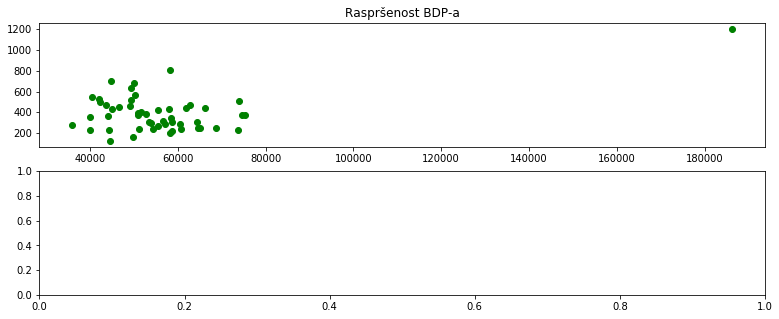

In [142]:
koef, pv = sc.stats.spearmanr(BDP, stopa_zlocina)

sstr = 'Spearmanov koeficijent za BDP i stope zločina: %6.4f, p-vrijednost: %6.4f '
print (sstr % (koef, pv))

#ne možemo koristiti spearmana zbog ovog dolje
fig, axes=plt.subplots(2,figsize=(13,5))
axes[0].scatter(BDP, stopa_zlocina, c='green')
axes[0].set_title(u'Raspršenost BDP-a')
axes[0].axis('tight');

Uočimo kako zvog raspršenosti ne možemo ništa zaključiti iz Spearmanovog koeficijenta. Zbog toga koristimo Kendalov koeficijent korelacije.

### Kendalov koeficijent korelacije

Kendalov koeficijent korelacije $\tau$ određuje jačinu veze dvaju diskretnih statističkih obilježja u odnosu na rangove njihove vrijednosti. Kendalov koeficijent korelacije dobijemo tako da najprije vrijednostima obilježja $X$ i $Y$ dodijelimo rangove. Zatim promatramo parove rangova u uzorku za dvodimenzionalno obilježje $(X,Y)$. Označimo sa $C$ broj inverzija među tim parovima, te neka je $D$ broj onih parova koji nisu u inverziji. Tada je Kendalllov koeficijent orelacije jednak
 $$\tau=\frac{C-D}{C+D}$$

In [144]:
datas.corr(method='kendall')

,populacija,zlocini,stopa_zlocina,BDP
populacija,1.000000,0.774118,0.094902,0.061961
zlocini,0.774118,1.000000,0.320784,0.005490
stopa_zlocina,0.094902,0.320784,1.000000,-0.093333
BDP,0.061961,0.005490,-0.093333,1.000000


Primjećujemo da korelacija između BDP-a i stope_zlocina iznosi $τ=−0.093333$ .

### Kovarijacijska matrica

In [145]:
datas.cov()

,populacija,zlocini,stopa_zlocina,BDP
populacija,5.247335e+13,2.237150e+11,1.806018e+07,7.937657e+08
zlocini,2.237150e+11,9.946497e+08,8.378339e+05,4.709384e+06
stopa_zlocina,1.806018e+07,8.378339e+05,3.421037e+04,1.914405e+06
BDP,7.937657e+08,4.709384e+06,1.914405e+06,4.338107e+08


////nastavaka

## 2. Analiza stope zločina od 1995. do 2016. godine na razini cijelog SAD-a

U ovom dijelu koristimo podatke iz datoteke *crimes.txt* .

Prikaz datoteke *crimes.txt* :

In [146]:
names = ['godina','populacija','nasilni_zlocini','stopa_nasilnih_zlocina','ubojstva','stopa_ubojstava',
         'silovanja','stopa_silovanja']
datac = pd.read_csv('data/crimes.txt', delimiter='\t', names=names) #datac-sadrzi zlocine po godinama

#pretvorba brojcanih vrijednosti u float i int
godina1 = [int(v) for v in datac.godina]
datac['godina'] = godina1
populacija1 = [int(v) for v in datac.populacija]
datac['populacija'] = populacija1
nasilni_zlocini1 = [int(v) for v in datac.nasilni_zlocini]
datac['nasilni_zlocini'] = nasilni_zlocini1
stopa_nasilnih_zlocina1 = [float(v) for v in datac.stopa_nasilnih_zlocina]
datac['stopa_nasilnih zlocina'] = stopa_nasilnih_zlocina1
ubojstva1 = [int(v) for v in datac.ubojstva]
datac['ubojstva'] = ubojstva1
stopa_ubojstava1 = [float(v) for v in datac.stopa_ubojstava]
datac['stopa_ubojstava'] = stopa_ubojstava1
silovanja1 = [int(v) for v in datac.silovanja]
datac['silovanja'] = silovanja1
stopa_silovanja1 = [float(v) for v in datac.stopa_silovanja]
datac['stopa_silovanja'] = stopa_silovanja1

godina = np.asarray(datac.godina)
populacija = np.asarray(datac.populacija)
nasilni_zlocini = np.asarray(datac.nasilni_zlocini)
stopa_nasilnih_zlocina = np.asarray(datac.stopa_nasilnih_zlocina)
ubojstva = np.asarray(datac.ubojstva)
stopa_ubojstava = np.asarray(datac.stopa_ubojstava)
silovanja = np.asarray(datac.silovanja)
stopa_silovanja = np.asarray(datac.stopa_silovanja)

datac.head()

,godina,populacija,nasilni_zlocini,stopa_nasilnih_zlocina,ubojstva,stopa_ubojstava,silovanja,stopa_silovanja,stopa_nasilnih zlocina
0,1976,214659000,1004210,467.8,18780,8.8,57080,26.6,467.8
1,1977,216332000,1029580,475.9,19120,8.8,63500,29.4,475.9
2,1978,218059000,1085550,497.8,19560,9.0,67610,31.0,497.8
3,1979,220099000,1208030,548.9,21460,9.7,76390,34.7,548.9
4,1980,225349264,1344520,596.6,23040,10.2,82990,36.8,596.6
